In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from PIL import Image

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn import neighbors
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm

from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

import cv2
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Algorithms

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score, f1_score, plot_confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

def create_vectorizer(train_data, *kwargs, max_features=1):
    vectorizer = CountVectorizer(max_features=max_features)
    res        = [vectorizer]
    res.append(vectorizer.fit_transform(train_data).toarray())
    for arg in kwargs:
        res.append(vectorizer.transform(arg).toarray())
    return res

scaler = None
def create_scaling(X):
    global scaler
    scaler = StandardScaler().fit(X)

def remove_outlyers(data, label, threshold=100):
    mask = (data>threshold).sum(axis=1)==0
    print("removing {} rows\n".format(np.sum(~mask)))
    return [data[mask], label.drop(label.index[~mask])]

def create_knn(train_data, target, **kwargs):
    clf = KNeighborsClassifier(**kwargs)
    clf.fit(train_data, target )
    return clf

def create_perceptron(train_data, target, grid=[], **kwargs):
    if grid != []:
        clf = GridSearchCV(Perceptron(), grid, refit = True, verbose = 3,n_jobs=2)
    else:
        clf = Perceptron(**kwargs)
    clf.fit(train_data, target)
    return clf

def create_rnd_forrest(train_data, target, grid=[], **kwargs):
    if grid != []:
        clf = GridSearchCV(RandomForestClassifier(), grid, refit = True, verbose = 3,n_jobs=2)
    else:
        clf = RandomForestClassifier(**kwargs)
    clf.fit(train_data, target)
    return clf

def create_nb(train_data, target, **kwargs):
    clf =MultinomialNB( **kwargs)
    clf.fit(train_data , target)
    return clf
    
def _create_MLP(input_dim):
    model = Sequential()
    model.add(Dense(256, activation="relu"))
    model.add(Dense(256, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

def create_MLP(X_train, y_train):
    
    mlp = KerasClassifier(build_fn=(lambda: _create_MLP(X_train.shape[1])), epochs=15, batch_size=32, verbose=0)
    mlp.fit(X_train, np_utils.to_categorical(y_train))
    return mlp

def plot_confusion_matrix_MLP(mlp, X_test, y_test):
    y_pred = mlp.predict(X_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, normalize='pred'))
    disp.plot()
    plt.title('Multi-layer perceptron confusion matrix')
    plt.show()
    
def get_metrics(algo, test_data, test_target, train_data, train_target):
    pred_test  = algo.predict(test_data)
    pred_train = algo.predict(train_data)

    return classification_report(test_target, pred_test,output_dict=True),\
           classification_report(train_target, pred_train,output_dict=True)
    

# Import Cifar using Tensor flow

In [3]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train) , (X_test,y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


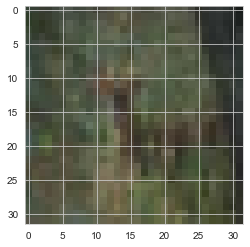

In [5]:
#Example of image
plt.imshow(X_train[10])

(256, 1)


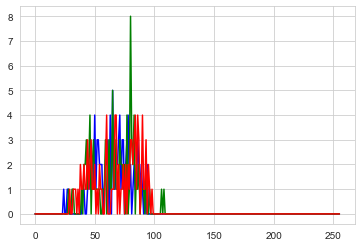

In [6]:
#Example of RGB histogram plot
images=X_train[10]
channels = [0] # [1] or [2] for green or red 0 is blue
mask= None
histSize = [256] # Number of bins, forr full scale take 256
ranges= [0,256] # this is our RANGE. Normally, it is [0,256].
hist_blue=cv2.calcHist(images, channels, mask, histSize, ranges)
hist_green=cv2.calcHist(images, [1], mask, histSize, ranges)
hist_red=cv2.calcHist(images, [2], mask, histSize, ranges)
#plt.plot(hist_blue, hist_green, hist_red)
plt.plot(hist_blue, color= 'blue')
plt.plot(hist_green, color= 'green')
plt.plot(hist_red , color ='red')
print(hist_green.shape)

In [7]:
print(class_names[y_train[10][0]])

deer


In [8]:
mask= None
histSize = [256] # Number of bins, forr full scale take 256
ranges= [0,256] # this is our RANGE. Normally, it is [0,256].

data=[]
for i in range(0,len(X_train[0:1000])):
    hist=np.empty((0,0))
    images = X_train[i]
    # Not all images in our dataset are in RGB color scheme (e.g. indexed colours)
    # We need to make sure that they are RGB , otherwise we can't expect to have exactly three RGB channels..
    #imagePIL = imagePIL.convert('RGB')   
    #images = imagePIL.convert('RGB') 
    hist_blue=cv2.calcHist(images, [0], mask, histSize, ranges)
    hist_green=cv2.calcHist(images, [1], mask, histSize, ranges)
    hist_red=cv2.calcHist(images, [2], mask, histSize, ranges)
    hist = np.append(hist, hist_blue)
    hist = np.append(hist, hist_green)
    hist = np.append(hist, hist_red)
    featureVector=hist
    #if (len(featureVector) != 768): # just a sanity check; with the transformation to RGB, this should never happen
    #    print("Unexpected length of feature vector: " + i)
    data.append((featureVector))
np_data=np.array(data)
#print(data)
print(np_data.shape)
#print(np_data)

(1000, 768)


In [9]:
print(len(X_train))

50000


In [10]:
dataOpenCV_1D=[]
dataOpenCV_2D=[]
dataOpenCV_3D=[]

# use our own simple function to flatten the 2D arrays
flatten = lambda l: [item for sublist in l for item in sublist]

for i in range(0,len(X_train[0:1000])):
    featuresOpenCV_1D = []
    #hist=np.empty((0,0))
    images = X_train[i]
    
    channels= ([0], [1], [2])
    color = ("b", "g", "r")
    
    histSize_1d=[64] 
    featuresOpenCV_1D = []
    for (channels, color) in zip(channels,color):
        
        # Not all images in our dataset are in RGB color scheme (e.g. indexed colours)
        # We need to make sure that they are RGB , otherwise we can't expect to have exactly three RGB channels..
        #imagePIL = imagePIL.convert('RGB')   
        #images = imagePIL.convert('RGB') 
        hist_opencv=cv2.calcHist(images, channels, mask, histSize_1d, ranges)
        featuresOpenCV_1D=np.append(featuresOpenCV_1D, hist_opencv)
    featureVectorOpenCV_1D = featuresOpenCV_1D
    dataOpenCV_1D.append(featureVectorOpenCV_1D) 
    
    #if (len(featureVectorOpenCV_1D) != bins_1D*3): # sanity check, in case we had a wrong number of channels...
    #    print "Unexpected length of feature vector: " + str(len(featureVectorOpenCV_1D)) + " in file: " + i
    
np_dataOpenCV_1D=np.array(dataOpenCV_1D)

#print(data)
print(np_dataOpenCV_1D.shape)
print(np_dataOpenCV_1D)

(1000, 192)
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  4.  0.  0.]
 [ 0.  0.  0. ...  0.  1. 80.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  2.  2. 61.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [12]:
dataOpenCV_2D=[]

for i in range(0,len(X_train[0:1000])):
    featuresOpenCV_2D = []
    #hist=np.empty((0,0))
    images = X_train[i]
    
    channels= [[0], [1], [2]]
    color = ("b", "g", "r")
    
    histSize_2d= 16 
    featuresOpenCV_2D = []
        
        # Not all images in our dataset are in RGB color scheme (e.g. indexed colours)
        # We need to make sure that they are RGB , otherwise we can't expect to have exactly three RGB channels..
        #imagePIL = imagePIL.convert('RGB')   
        #images = imagePIL.convert('RGB') 
    hist_opencv_2d_1 = cv2.calcHist(images,  [0,1], mask, [histSize_2d, histSize_2d], [0, 256, 0, 256])
    hist_opencv_2d_2 = cv2.calcHist(images,  [0,2], mask, [histSize_2d, histSize_2d], [0, 256, 0, 256])
    hist_opencv_2d_3 = cv2.calcHist(images,  [1,2], mask, [histSize_2d, histSize_2d], [0, 256, 0, 256])
    featuresOpenCV_2D= np.append(featuresOpenCV_2D, hist_opencv_2d_1)
    featuresOpenCV_2D= np.append(featuresOpenCV_2D, hist_opencv_2d_2)
    featuresOpenCV_2D= np.append(featuresOpenCV_2D, hist_opencv_2d_3)
    featureVectorOpenCV_2D = featuresOpenCV_2D # and append this to our feature vector
    dataOpenCV_2D.append(featureVectorOpenCV_2D) # now we append the feature vector to the dataset so far
    
    #if (len(featureVectorOpenCV_1D) != bins_1D*3): # sanity check, in case we had a wrong number of channels...
    #    print "Unexpected length of feature vector: " + str(len(featureVectorOpenCV_1D)) + " in file: " + i
    
np_dataOpenCV_2D= np.array(dataOpenCV_2D)

#print(data)
print(np_dataOpenCV_2D.shape)
print(np_dataOpenCV_2D)

(1000, 768)
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  2.  5.]
 [ 0.  0.  0. ...  0.  1. 81.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  6. 66.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [11]:
dataOpenCV_3D=[]

for i in range(0,len(X_train[0:1000])):
    featuresOpenCV_2D = []
    #hist=np.empty((0,0))
    images = X_train[i]
    
    channels= [[0], [1], [2]]
    color = ("b", "g", "r")
    
    histSize_3d= 8 
    featuresOpenCV_3D = []
        
        # Not all images in our dataset are in RGB color scheme (e.g. indexed colours)
        # We need to make sure that they are RGB , otherwise we can't expect to have exactly three RGB channels..
        #imagePIL = imagePIL.convert('RGB')   
        #images = imagePIL.convert('RGB') 
    hist_opencv_3d = cv2.calcHist(images,  [0,1,2], mask, [histSize_3d, histSize_3d,histSize_3d ], [0, 256, 0, 256,  0, 256])
    featuresOpenCV_3D= np.append(featuresOpenCV_2D, hist_opencv_3d)
    featureVectorOpenCV_3D = featuresOpenCV_3D # and append this to our feature vector
    dataOpenCV_3D.append(featureVectorOpenCV_3D) # now we append the feature vector to the dataset so far
    #if (len(featureVectorOpenCV_1D) != bins_1D*3): # sanity check, in case we had a wrong number of channels...
    #    print "Unexpected length of feature vector: " + str(len(featureVectorOpenCV_1D)) + " in file: " + i    
np_dataOpenCV_3D= np.array(dataOpenCV_3D)
print(np_dataOpenCV_3D.shape)
print(np_dataOpenCV_3D)

(1000, 512)
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  2.]
 [ 0.  0.  0. ...  0.  5. 82.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  6.  0. 72.]
 [ 0.  0.  0. ...  0.  0.  0.]]


[6 1 4 2 9 2 5 2 6 4 5 1 1 6 0 7 0 7 6 2 4 1 1 8 3 2 4 7 8 6 6 6 4 4 5 2 1
 0 1 4 2 2 5 5 5 5 6 9 2 4 3 6 9 6 0 4 8 9 3 5 0 9 8 2 1 0 6 3 9 4 6 2 6 7
 5 6 6 9 8 0 8 5 3 5 0 3 2 3 8 1 8 2 0 9 7 6 1 8 3 4]
[8 5 9 4 5 1 1 2 9 6 2 6 1 0 4 6 0 2 3 6 1 9 4 5 6 3 9 7 3 6 1 1 9 5 4 2 7
 8 9 1 3 1 6 3 9 4 1 7 1 4 5 0 7 6 4 0 1 2 0 2 5 9 8 2 7 1 1 2 3 7 4 6 0 7
 1 9 4 4 9 6 5 9 4 7 6 9 2 7 2 1 1 1 2 3 1 6 6 5 1 9]
[6 7 7 8 2 4 8 7 4 3 9 9 0 5 3 9 2 6 3 9 7 0 1 7 2 9 1 9 6 5 6 7 1 9 6 3 4
 8 9 4 5 9 9 8 6 9 6 8 5 2 3 3 6 7 9 9 1 1 7 0 3 5 2 6 0 2 9 4 7 6 9 1 1 8
 0 6 8 9 3 9 9 8 7 6 5 0 4 1 9 8 0 8 2 2 8 4 8 8 6 0]
[1 7 8 0 2 2 8 3 8 2 6 8 1 1 2 7 6 3 8 9 6 4 0 8 9 9 9 7 3 4 8 2 3 6 9 2 1
 9 9 2 2 1 2 0 7 2 0 9 5 9 5 3 0 4 7 2 3 7 6 7 3 9 9 9 4 3 6 5 1 1 5 3 9 6
 2 7 3 7 6 8 4 8 1 6 8 5 0 2 8 5 3 5 3 6 3 8 8 4 7 1]
[3 6 9 2 2 4 0 7 0 8 0 0 3 2 2 4 6 1 1 8 2 2 6 5 8 4 2 8 0 7 8 7 8 2 4 8 0
 5 0 1 7 7 2 6 1 4 7 8 5 7 5 4 1 1 8 0 5 3 8 3 2 2 8 1 6 8 3 5 1 9 4 6 4 5
 6 6 9 5 5 4 6 0 0 2 4 6 1 4 8 2 7

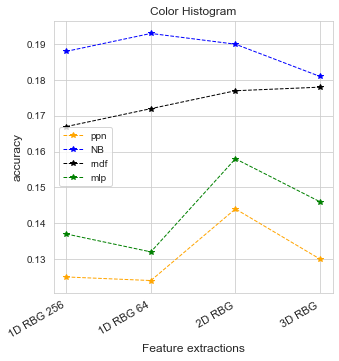

In [13]:
def calc_score_MLP(mlp, X, Y, cv, epochs, batch_size):
    kfold = KFold(n_splits=cv, shuffle=True)
    acc_per_fold = []
    for train, test in kfold.split(X, Y):
        train_data = np.take(X, train, 0)
        train_target = np.take(Y, train, 0)
        test_data = np.take(X, test, 0)
        test_target = np.take(Y, test, 0)
        history = mlp.fit(train_data, np_utils.to_categorical(train_target), batch_size=batch_size, epochs=epochs, verbose=0)
        y_pred = mlp.predict(test_data)
        print(y_pred)
        score = accuracy_score(y_pred, test_target)
        acc_per_fold.append(score)
    return np.array(acc_per_fold)

# Classification
import warnings
warnings.filterwarnings('ignore')

# these are our feature sets; we will use each of them individually to train classifiers
trainingSets = [np_data, np_dataOpenCV_1D, np_dataOpenCV_2D, np_dataOpenCV_3D]

vals      = trainingSets
trainingLabel=y_train[0:1000]
scores_ppn, scores_NB, scores_rndf, scores_mlp = [], [], [], []
for X in vals:
    
    ppn = create_perceptron(pd.DataFrame(X), pd.DataFrame(trainingLabel))
    scores_ppn.append(cross_val_score(ppn, pd.DataFrame(X), pd.DataFrame(trainingLabel), scoring="accuracy", cv=10).mean())
    
    NB = create_nb(pd.DataFrame(X), pd.DataFrame(trainingLabel))
    scores_NB.append(cross_val_score(NB, pd.DataFrame(X), pd.DataFrame(trainingLabel), scoring="accuracy", cv=10).mean())
    
    rndf = create_rnd_forrest(pd.DataFrame(X), pd.DataFrame(trainingLabel),random_state=42, n_estimators=50)
    scores_rndf.append(cross_val_score(rndf, pd.DataFrame(X), pd.DataFrame(trainingLabel), scoring="accuracy", cv=10).mean())
    
    create_scaling(X)
    X = scaler.transform(X)
    
    mlp = create_MLP(X, trainingLabel)
    scores_mlp.append(calc_score_MLP(mlp, X, trainingLabel, cv=10, epochs=15, batch_size=32).mean())
    
print(scores_ppn)
print(scores_NB)
print(scores_rndf)
print(scores_mlp)

Nr_data = np.arange(4)
plt.figure(figsize=(5,5))
plt.plot(Nr_data, scores_ppn,"--",color="orange",marker="*", linewidth=1,label="ppn")
plt.plot(Nr_data, scores_NB,"--",color="blue",marker="*", linewidth=1,label="NB")
plt.plot(Nr_data, scores_rndf,"--",color="black",marker="*", linewidth=1,label="rndf")
plt.plot(Nr_data, scores_mlp,"--",color="green",marker="*", linewidth=1,label="mlp")
plt.legend(loc="best")
plt.title("Color Histogram",fontsize=12)
plt.ylabel("accuracy",fontsize=12)
plt.xlabel("Feature extractions",fontsize=12)
labels =["1D RBG 256", "1D RBG 64", "2D RBG", "3D RBG"]
plt.xticks(Nr_data, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./Accuracy_color_hist.png")

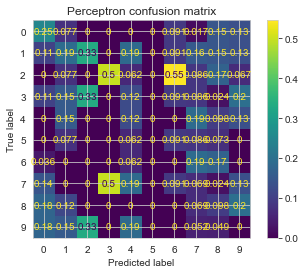

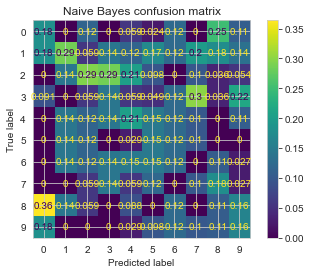

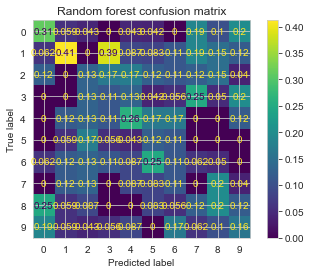

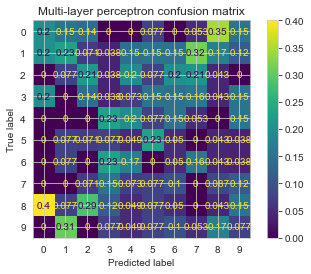

<Figure size 432x288 with 0 Axes>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(np_dataOpenCV_3D, trainingLabel, test_size=0.2, random_state=42)

ppn = create_perceptron(X_train, y_train)
plot_confusion_matrix(ppn, X_test, y_test, normalize='pred')
plt.title('Perceptron confusion matrix')
plt.savefig("./CM__ppn_color_hist.png")

NB = create_nb(X_train, y_train)
plot_confusion_matrix(NB, X_test, y_test, normalize='pred')
plt.title('Naive Bayes confusion matrix')
plt.savefig("./CM__NB_color_hist.png")

rndf = create_rnd_forrest(X_train, y_train, random_state=42, n_estimators=50)
plot_confusion_matrix(rndf, X_test, y_test, normalize='pred')
plt.title('Random forest confusion matrix')
plt.savefig("./CM__Rndf_color_hist.png")

create_scaling(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)
mlp = create_MLP(X_train, y_train)
plot_confusion_matrix_MLP(mlp, X_test, y_test)
plt.savefig("./CM__MLP_color_hist.png")

# SIFT

In [15]:
(X_train,y_train) , (X_test,y_test) = cifar10.load_data()
Image_grey=cv2.cvtColor(X_train[0], cv2.COLOR_BGR2GRAY)
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


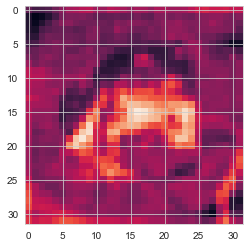

In [16]:
plt.imshow(Image_grey)

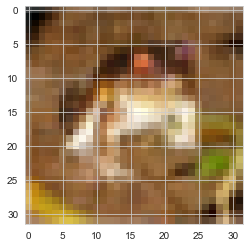

In [17]:
plt.imshow(X_train[0])

In [18]:
# SIFT
sift=cv2.xfeatures2d.SIFT_create()

# example of descriptors
keypoints, descriptors = sift.detectAndCompute(X_train[0], None)
keypoints, descriptors

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\opencv_contrib-4.0.1\modules\xfeatures2d\src\sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'


In [19]:
# resize X_train
X_train = X_train[:1000]
X, Y = [], []

# extract descriptors
descriptor_list = []
for i in range(len(X_train)):
    keypoints, descriptors = sift.detectAndCompute(X_train[i], None)
    if descriptors is None:
        plt.imshow(img)
    else:
        descriptor_list.append(descriptors)
        X.append(X_train[i])
        Y.append(y_train[i])

X_train = np.array(X)
y_train = np.array(Y)
input_size = len(X_train)

NameError: name 'sift' is not defined

In [64]:
descriptor_vstack = np.array(descriptor_list[0])
for remaining in descriptor_list[1:]:
    descriptor_vstack = np.vstack((descriptor_vstack, remaining))
descriptor_vstack

array([[  0.,   0.,   0., ...,  33.,  33.,   1.],
       [  3.,   0.,   0., ...,   0.,   0.,   0.],
       [ 19.,  10.,   5., ...,   0.,   9.,  10.],
       ...,
       [  0.,   0.,   8., ...,  12.,  41.,  28.],
       [121.,   6.,   1., ...,   0.,  34.,  41.],
       [  0.,   2., 147., ...,   0.,   0.,   0.]], dtype=float32)

In [65]:
# create clusters
n_clusters = 20
kmeans = KMeans(n_clusters = n_clusters)
kmeans = kmeans.fit_predict(descriptor_vstack)

In [66]:
print(kmeans)

[ 3 11  3 ...  8  5  4]


In [67]:
# create mega histogram
mega_histogram = np.array([np.zeros(n_clusters) for i in range(input_size)])
old_count = 0
for i in range(input_size): 
    l = len(descriptor_list[i])
    for j in range(l):
        idx = kmeans[old_count+j]
        mega_histogram[i][idx] += 1
    old_count += l
print("Vocabulary Histogram Generated")
mega_histogram

Vocabulary Histogram Generated


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 2., 2., ..., 1., 4., 3.],
       [0., 0., 1., ..., 0., 0., 2.],
       ...,
       [0., 0., 0., ..., 2., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 2., 1., 0.]])

In [68]:
# standardize
scale = StandardScaler().fit(mega_histogram)
X = scale.transform(mega_histogram)
print(X)
X

[[ 0.47156691 -0.75732286 -0.64750801 ... -0.72154124 -0.56385942
  -0.64793822]
 [-0.67186839  1.20015589  1.13447684 ...  0.59382317  3.12988197
   2.0755833 ]
 [-0.67186839 -0.75732286  0.24348442 ... -0.72154124 -0.56385942
   1.16774279]
 ...
 [-0.67186839 -0.75732286 -0.64750801 ...  1.90918758  0.35957593
  -0.64793822]
 [-0.67186839  0.22141651 -0.64750801 ... -0.72154124 -0.56385942
  -0.64793822]
 [-0.67186839  0.22141651 -0.64750801 ...  1.90918758  0.35957593
  -0.64793822]]


array([[ 0.47156691, -0.75732286, -0.64750801, ..., -0.72154124,
        -0.56385942, -0.64793822],
       [-0.67186839,  1.20015589,  1.13447684, ...,  0.59382317,
         3.12988197,  2.0755833 ],
       [-0.67186839, -0.75732286,  0.24348442, ..., -0.72154124,
        -0.56385942,  1.16774279],
       ...,
       [-0.67186839, -0.75732286, -0.64750801, ...,  1.90918758,
         0.35957593, -0.64793822],
       [-0.67186839,  0.22141651, -0.64750801, ..., -0.72154124,
        -0.56385942, -0.64793822],
       [-0.67186839,  0.22141651, -0.64750801, ...,  1.90918758,
         0.35957593, -0.64793822]])

[1 9 7 6 3 2 1 7 3 9 9 6 6 0 5 5 5 8 9 5 0 1 6 1 1 3 2 0 9 1 4 1 8 0 3 9 1
 2 9 0 6 0 3 1 1 3 6 3 5 5 6 3 3 6 9 1 7 6 2 0 8 6 0 8 4 3 5 0 4 9 1 9 9 7
 4 0 9 9 9 1 4 8 1 5 9 0 2 1 4 2 7 2 5 2 0 9 1 8 9 5]
[1 7 2 1 1 0 0 6 2 9 8 0 1 3 4 4 9 1 3 4 1 2 8 7 9 0 6 6 9 7 8 4 5 5 1 9 1
 0 1 7 1 8 8 2 8 0 9 5 0 9 7 0 8 9 3 1 8 0 4 8 3 1 4 0 8 8 6 0 9 4 9 6 2 0
 9 3 0 6 6 4 3 9 1 1 9 0 7 1 4 0 7 4 2 6 8 0 8 6 9 2]
[1 1 9 0 5 7 2 2 8 0 3 0 0 1 3 4 8 8 3 9 6 8 2 0 8 3 6 6 7 2 8 1 9 5 2 0 8
 2 0 5 0 1 1 4 2 1 6 9 6 2 7 2 9 1 7 8 0 2 9 9 7 1 3 7 9 7 3 2 6 2 2 2 2 0
 8 4 8 2 7 2 4 8 2 7 9 1 7 8 6 1 1 2 9 3 1 0 6 3 2 2]
[9 0 7 6 7 0 7 6 6 4 4 0 9 0 0 8 2 9 6 0 2 0 7 2 1 7 8 9 0 6 6 6 3 0 0 6 8
 0 6 1 5 1 3 2 2 1 1 0 9 9 2 6 6 8 2 0 0 1 3 6 0 2 5 6 5 2 6 2 5 1 0 8 1 6
 2 3 1 6 5 6 1 3 0 7 3 6 0 8 1 5 1 1 9 1 2 7 9 1 7 2]
[5 6 7 6 8 5 0 8 6 6 7 9 8 4 9 8 4 1 4 5 4 8 9 9 3 3 3 6 5 0 9 1 9 1 6 4 0
 1 5 1 9 8 8 3 6 4 7 3 1 9 8 4 9 1 8 7 1 2 8 9 5 0 0 3 6 8 6 9 5 4 9 1 3 0
 8 2 6 6 9 9 1 3 6 0 8 9 4 8 7 0 8

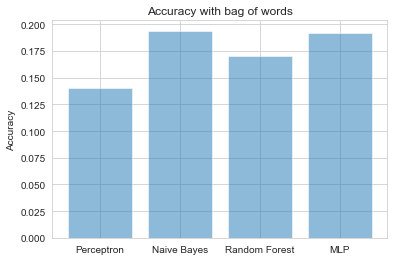

In [78]:
# Classification

trainingLabel=y_train[:input_size]

ppn = create_perceptron(pd.DataFrame(X), pd.DataFrame(trainingLabel))
score_ppn = cross_val_score(ppn, pd.DataFrame(X), pd.DataFrame(trainingLabel), scoring="accuracy", cv=10).mean()

NB = create_nb(pd.DataFrame(mega_histogram), pd.DataFrame(trainingLabel)) # cannot take negative values
score_NB = cross_val_score(NB, pd.DataFrame(mega_histogram), pd.DataFrame(trainingLabel), scoring="accuracy", cv=10).mean()

rndf = create_rnd_forrest(pd.DataFrame(X), pd.DataFrame(trainingLabel),random_state=42, n_estimators=50)
score_rndf = cross_val_score(rndf, pd.DataFrame(X), pd.DataFrame(trainingLabel), scoring="accuracy", cv=10).mean()

mlp = create_MLP(X, trainingLabel)
score_mlp = calc_score_MLP(mlp, X, trainingLabel, cv=10, epochs=15, batch_size=32).mean()
    
print(score_ppn)
print(score_NB)
print(score_rndf)
print(score_mlp)


objects = ('Perceptron', 'Naive Bayes', 'Random Forest', 'MLP')
y_pos = np.arange(len(objects))
scores = [score_ppn, score_NB, score_rndf, score_mlp]

plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Accuracy with bag of words')

plt.savefig("./Accuracy_BOW.png")
plt.show()

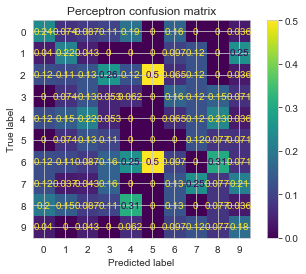

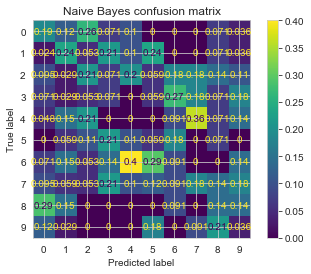

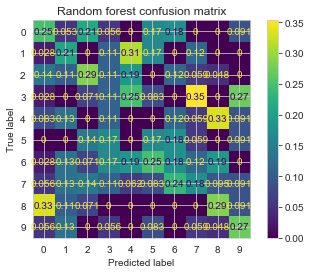

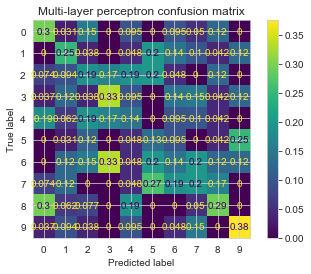

<Figure size 432x288 with 0 Axes>

In [81]:
_X_train, _X_test, y_train, y_test = train_test_split(mega_histogram, trainingLabel, test_size=0.2, random_state=42)
X_train, X_test = scale.transform(X_train), scale.transform(X_test)

ppn = create_perceptron(X_train, y_train)
plot_confusion_matrix(ppn, X_test, y_test, normalize='pred')
plt.title('Perceptron confusion matrix')
plt.savefig("./CM__ppn_BOW.png")

NB = create_nb(_X_train, y_train)
plot_confusion_matrix(NB, _X_test, y_test, normalize='pred')
plt.title('Naive Bayes confusion matrix')
plt.savefig("./CM__NB_BOW.png")

rndf = create_rnd_forrest(X_train, y_train, random_state=42, n_estimators=50)
plot_confusion_matrix(rndf, X_test, y_test, normalize='pred')
plt.title('Random forest confusion matrix')
plt.savefig("./CM__Rndf_BOW.png")

mlp = create_MLP(X_train, y_train)
plot_confusion_matrix_MLP(mlp, X_test, y_test)
plt.savefig("./CM__MLP_BOW.png")